In [1]:
info = []
date = []
with open('coindesk-bpi-USD-ohlc_data-2010-07-01_2018-02-05.csv') as f:
    for line in f.readlines():
        try:
            vals = line.strip('\n').split(',')
            info.append(list(map(float,vals[1:])))
            date.append(vals[0])
        except:
            continue
print(info[5],date[5])

input_line_30:3:1: error: expected body of lambda expression
date = []
^


We have now loaded the course data and will split it into convenient parts

In [54]:
OP = list(map(lambda v : v[0],info))
CL = list(map(lambda v : v[3],info))
HI = list(map(lambda v : v[1],info))
LO = list(map(lambda v : v[2],info))
MD = list(map(lambda v : (v[0]+v[1])/2.0,zip(HI,LO)))

We will put the date into a logarithm friendly form

In [61]:
MD0 = list(map(lambda m : m if m!=0 else 1,MD))

In [63]:
import matplotlib.pyplot as plt
from math import log
import numpy as np

Let's define a couple of functions after we have everything else in good order

In [83]:
def logplot(vals):
    plt.figure(figsize=(30,20),dpi=80)
    plt.plot(list(map(math.log,vals)))
    plt.ylabel('Bitcoin')
    plt.show()

In [117]:
def logplot2(vals1,vals2):
    plt.figure(figsize=(30,20),dpi=80)
    plt.plot(list(map(math.log,vals1)))
    plt.plot(list(map(math.log,vals2)))
    plt.ylabel('Bitcoin')
    plt.show()

In [79]:
def plot(vals):
    plt.figure(figsize=(30,20),dpi=80)
    plt.plot(vals)
    plt.ylabel('Bitcoin')
    plt.show()

In [98]:
def diff(y):
    x=np.linspace(0,len(y),len(y))
    dy = np.zeros(len(y),np.float)
    dy[0:-1] = np.diff(y)/np.diff(x)
    dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    return dy

In [113]:
def simpleconv(y,mask):
    return np.convolve(y, np.ones((mask,))/mask, mode='valid')

In [120]:
def logfriend(y):
    return list(map(lambda m : m if m>0 else 1,list(map(abs,y))))

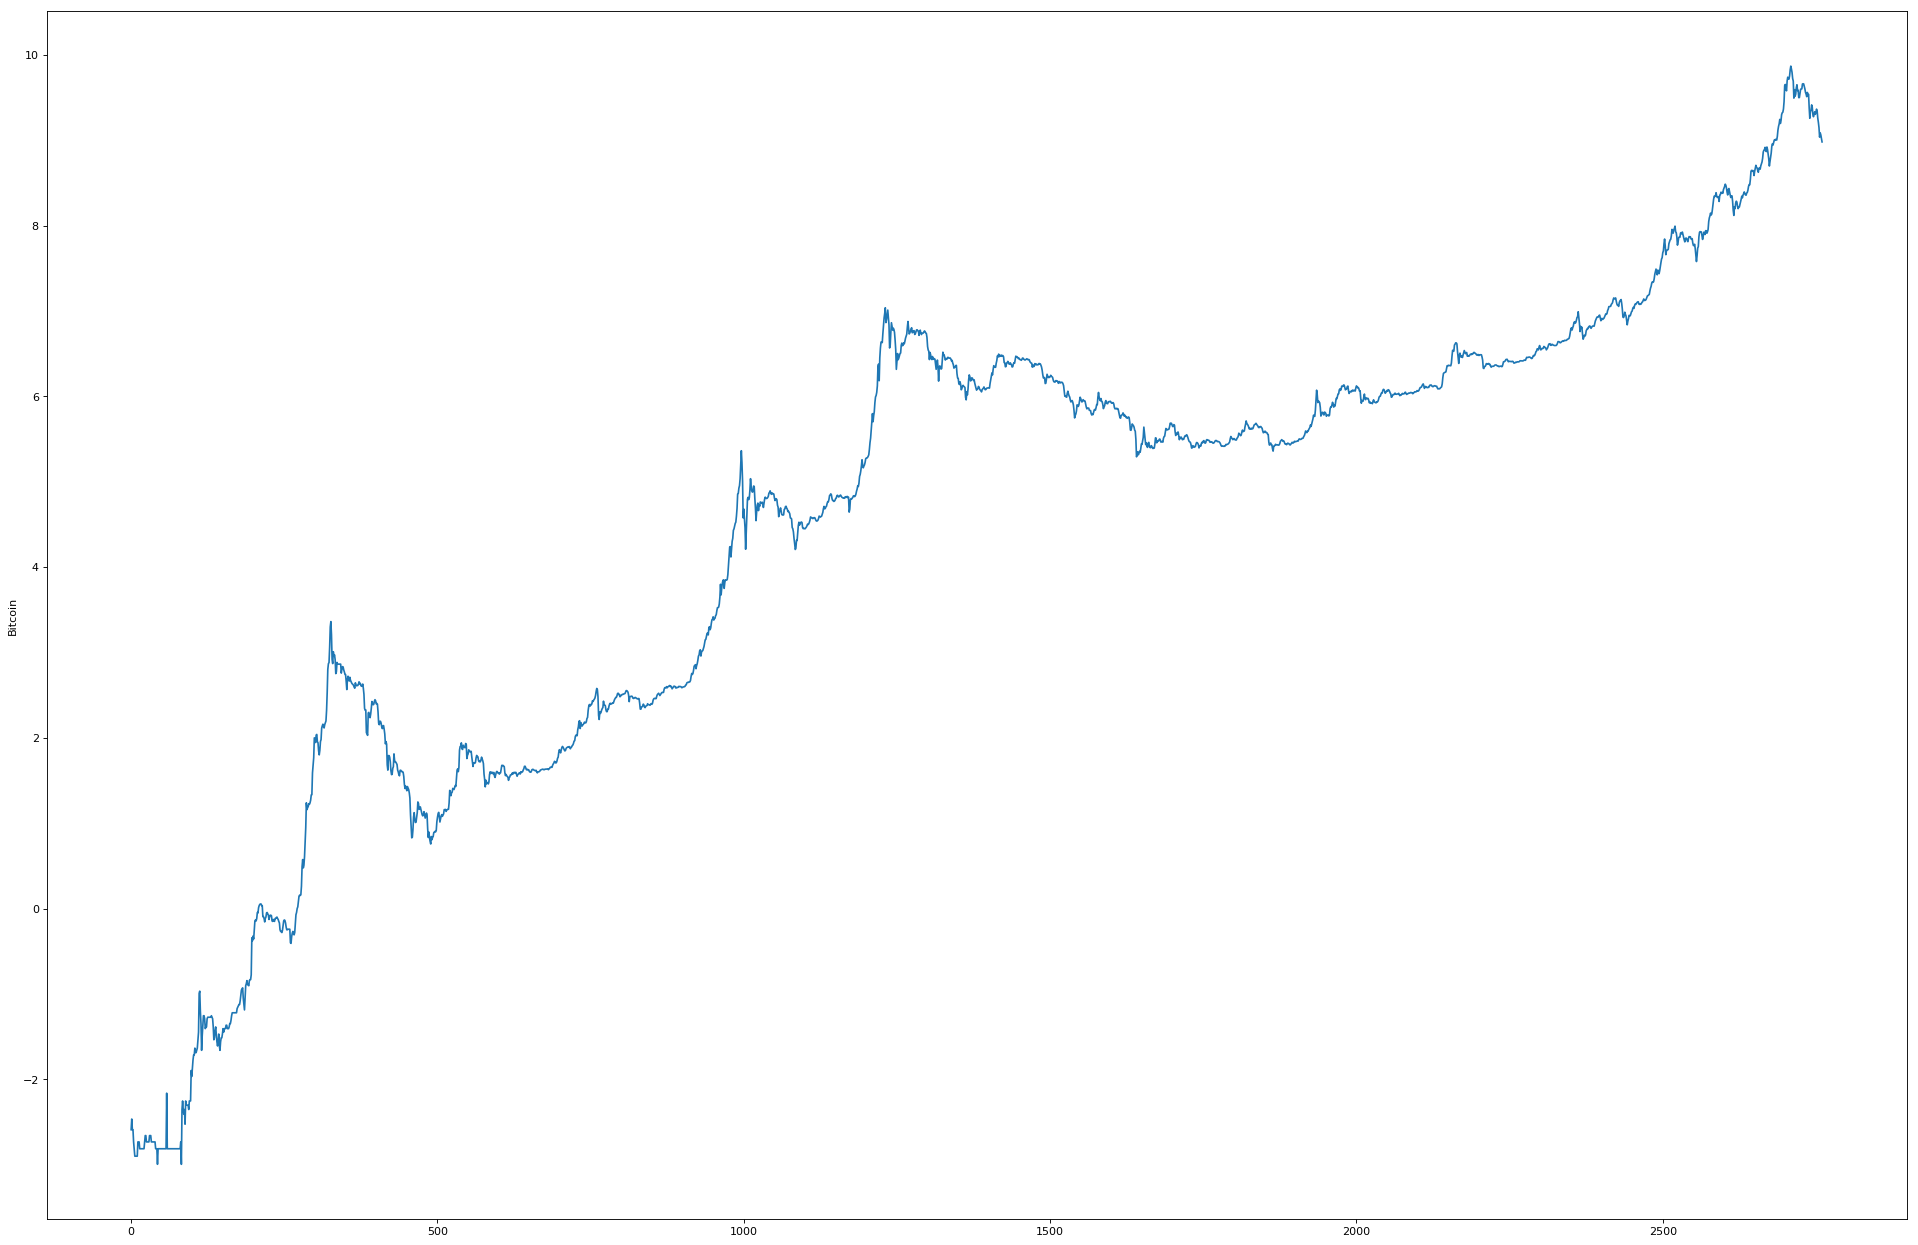

In [85]:
logplot(MD0)

In [131]:
MD0_deriv=diff(MD0)
MD0_lderiv=logfriend(MD0_deriv)

MD0_2deriv=diff(MD0_deriv)
MD0_l2deriv=logfriend(MD0_2deriv)

MD0_3deriv=diff(MD0_2deriv)
MD0_l3deriv=logfriend(MD0_3deriv)

MD0_fooderiv=diff(simpleconv(MD0,20))
MD0_lfooderiv=logfriend(MD0_fooderiv)

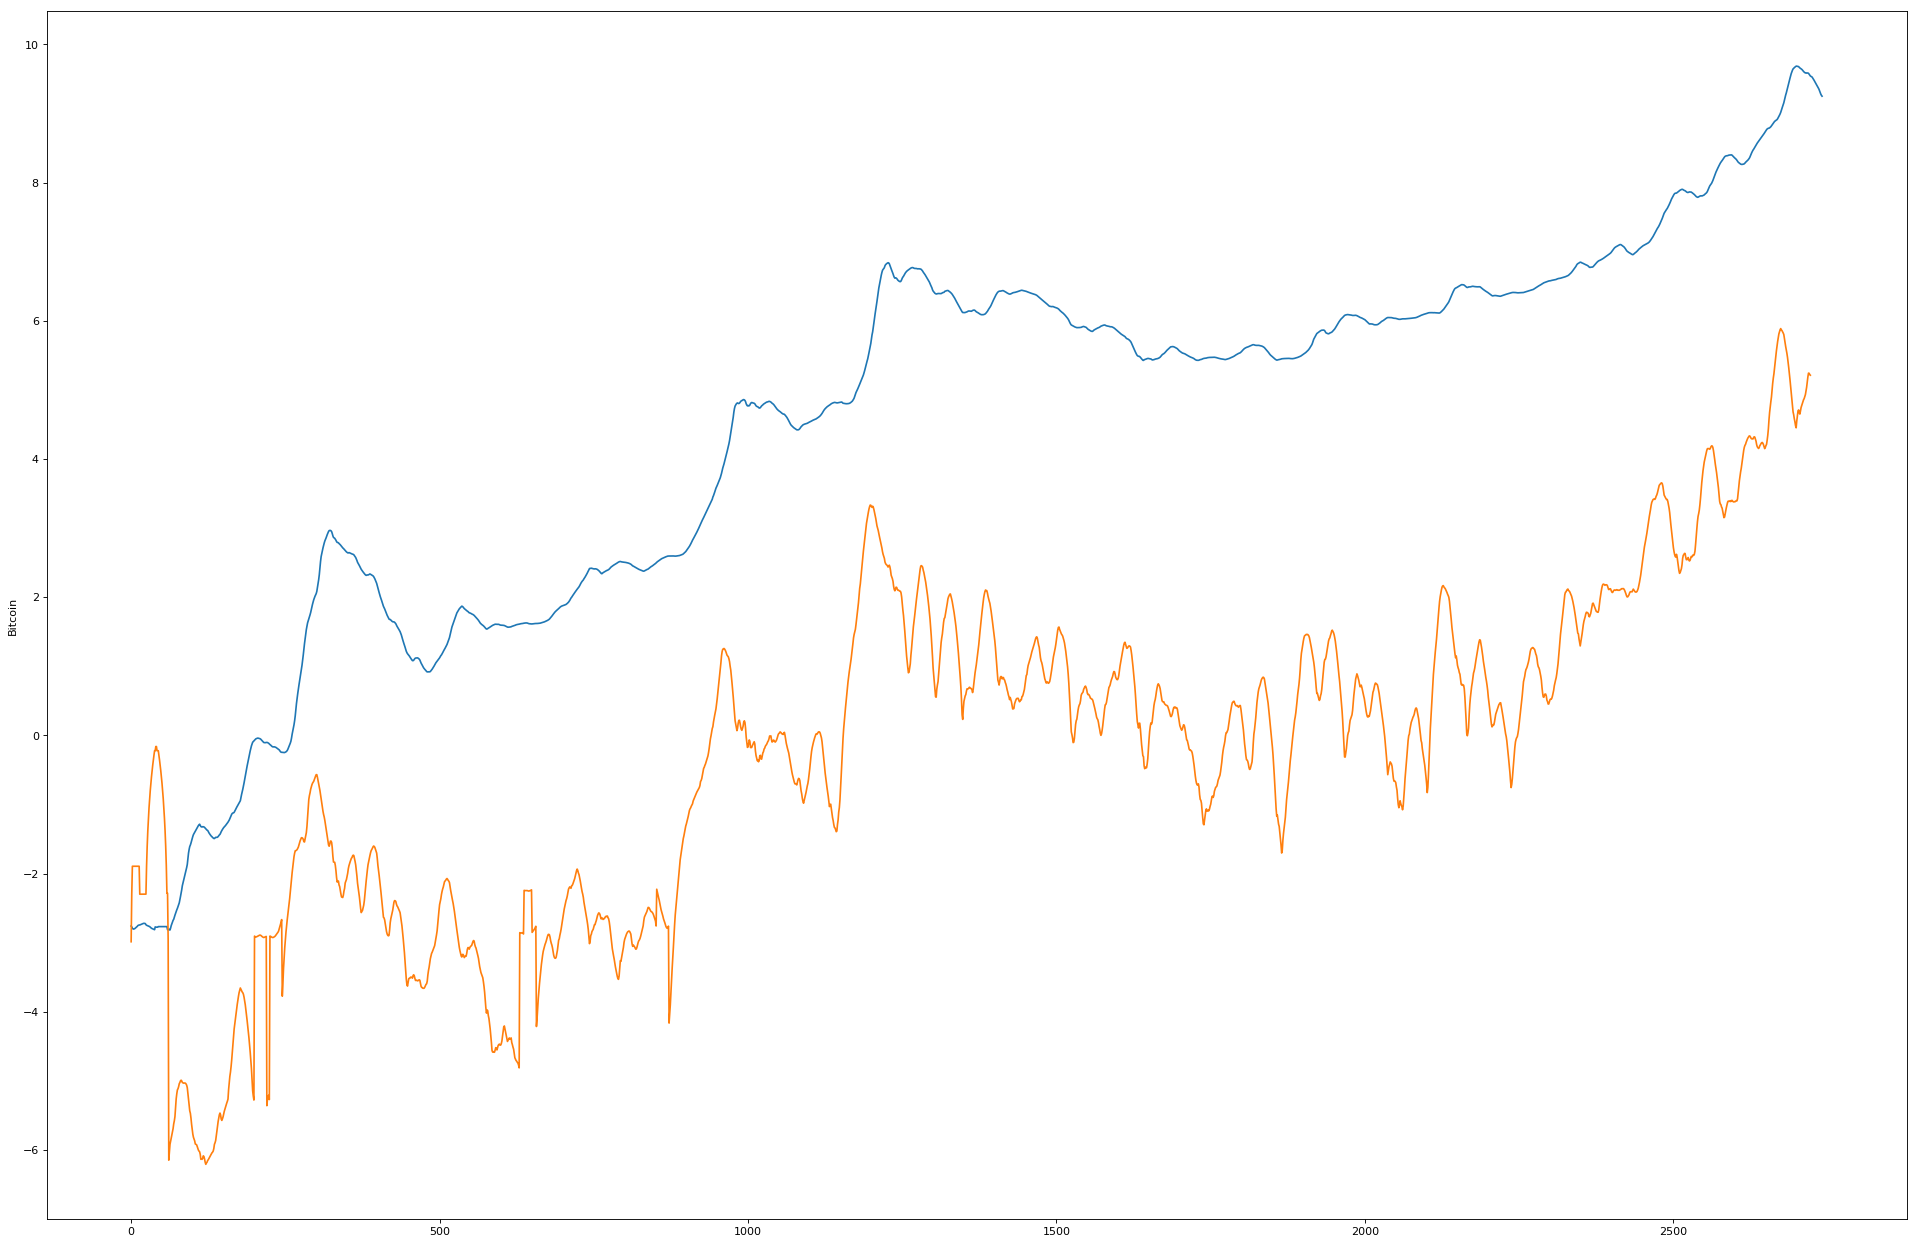

In [132]:
logplot2(simpleconv(MD0,20),simpleconv(MD0_lfooderiv,20))

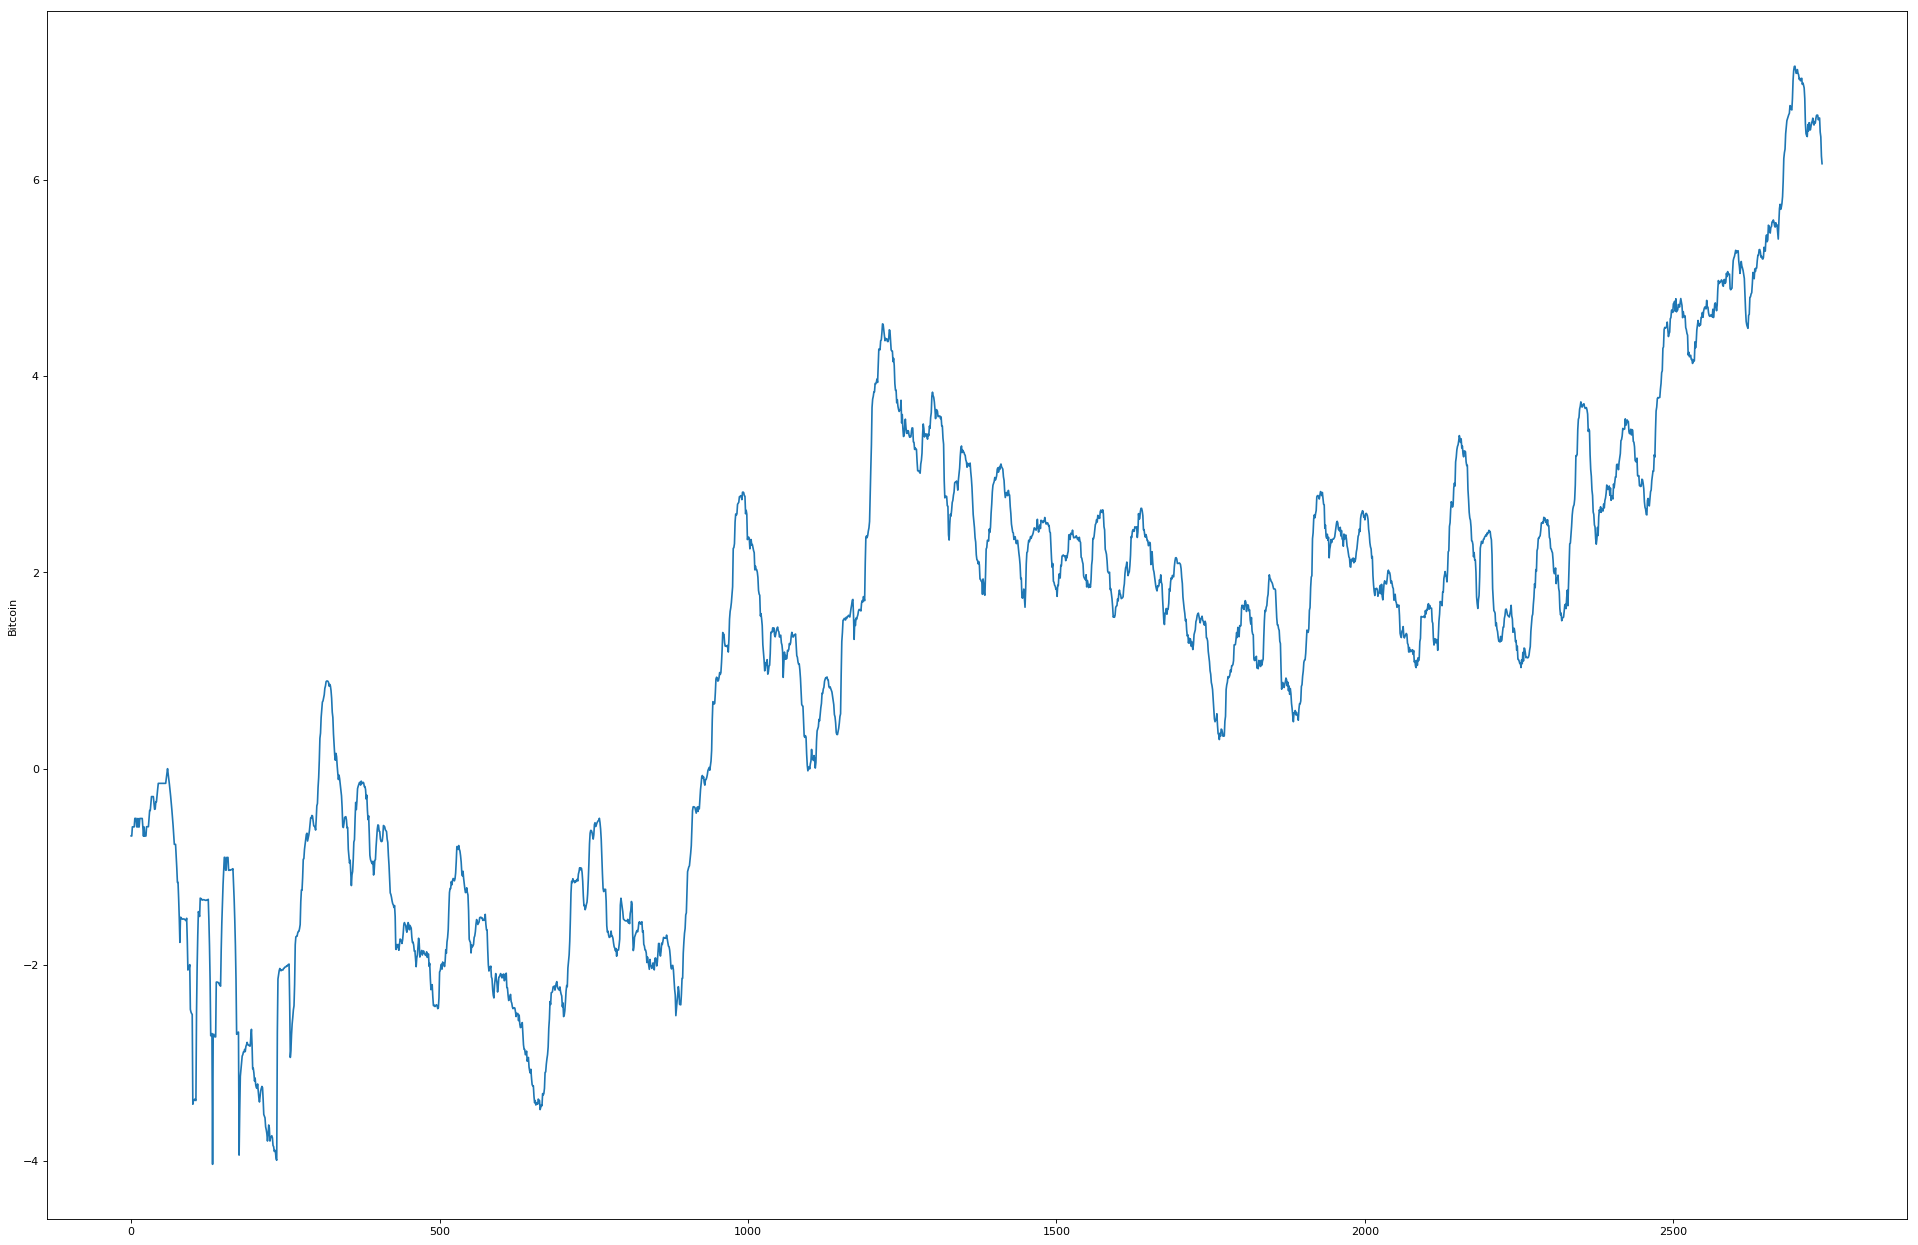

In [133]:
logplot(simpleconv(MD0_l2deriv,20))

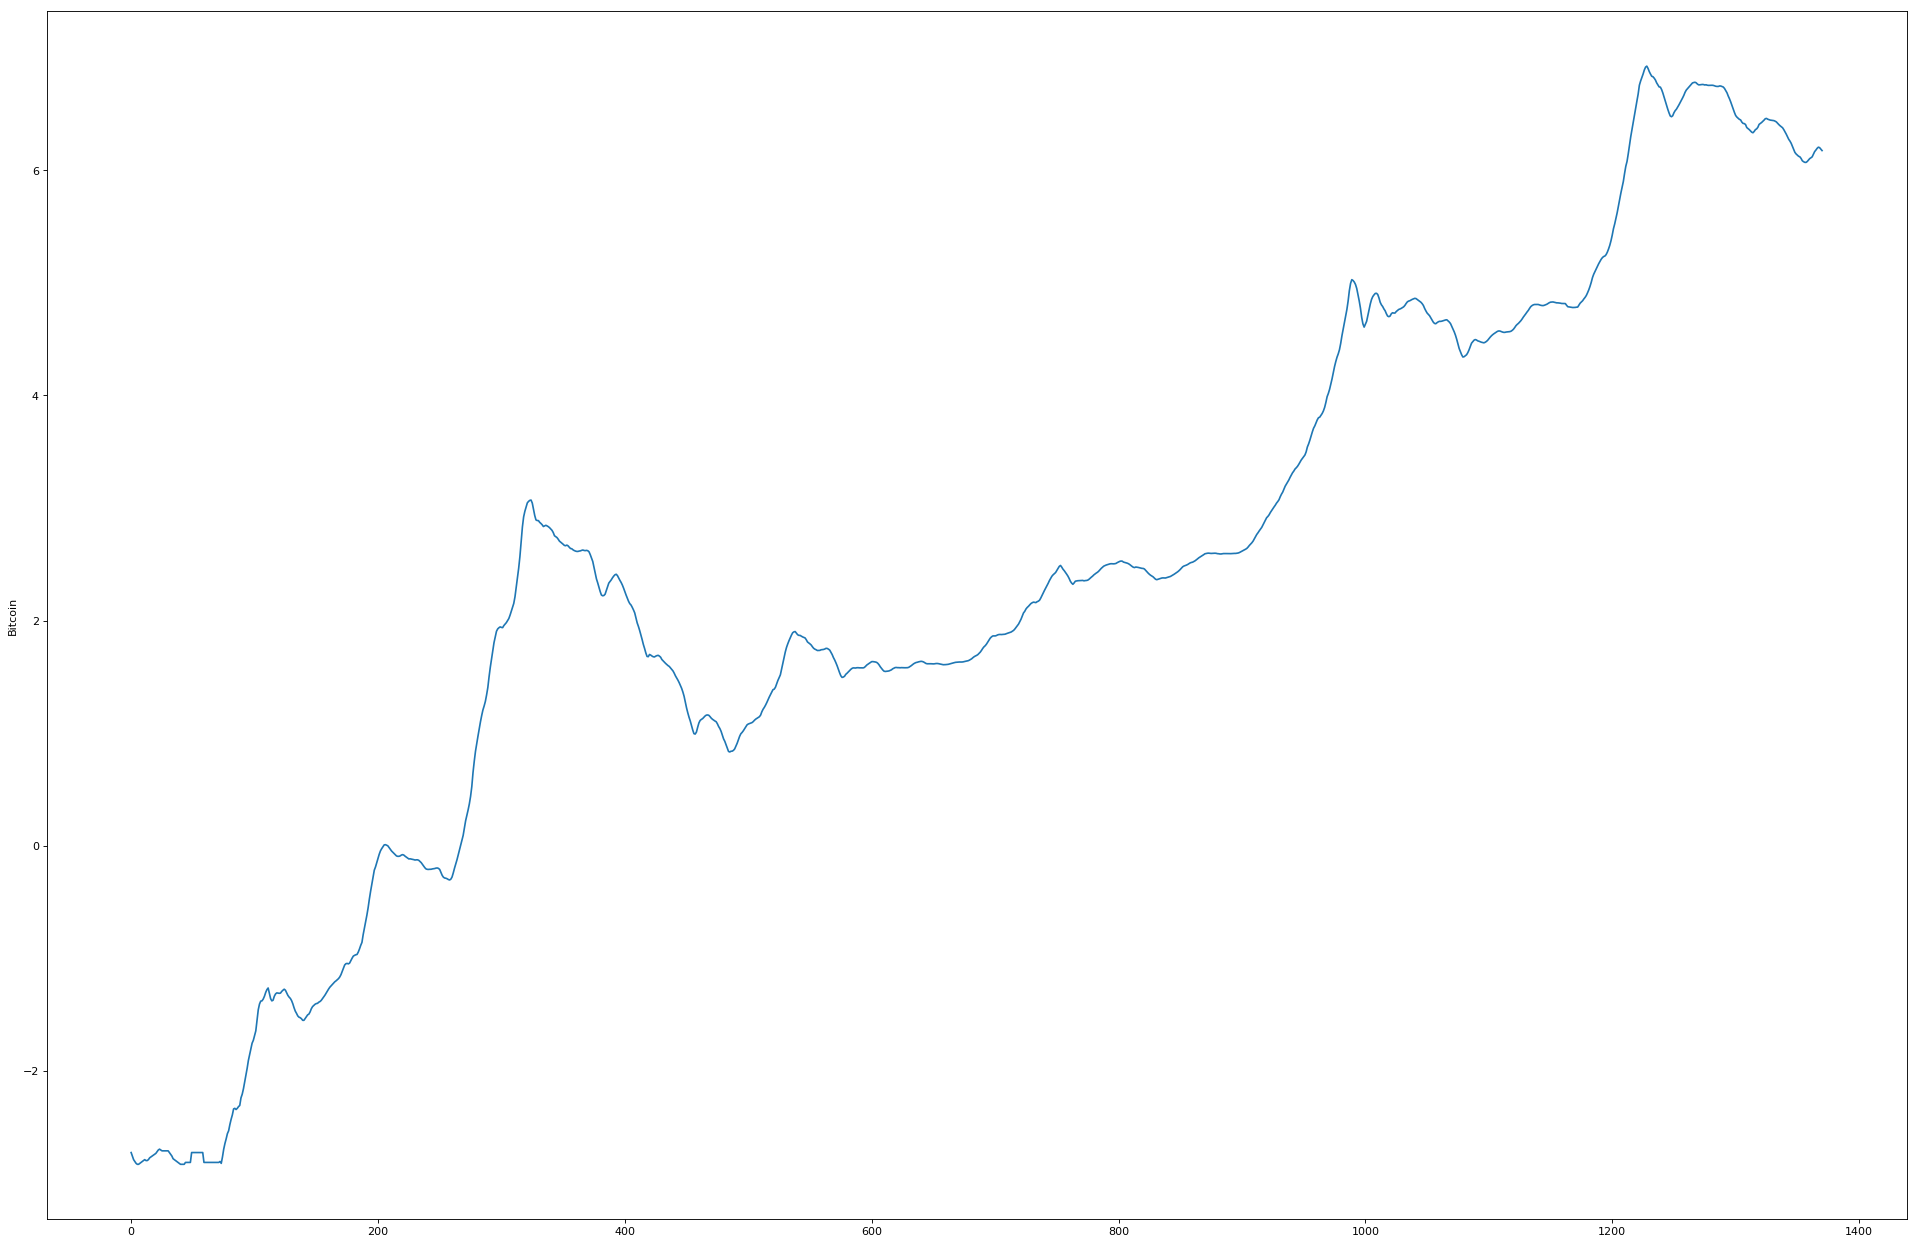

In [137]:
logplot(simpleconv(MD0[:int(len(MD0)/2)],10))

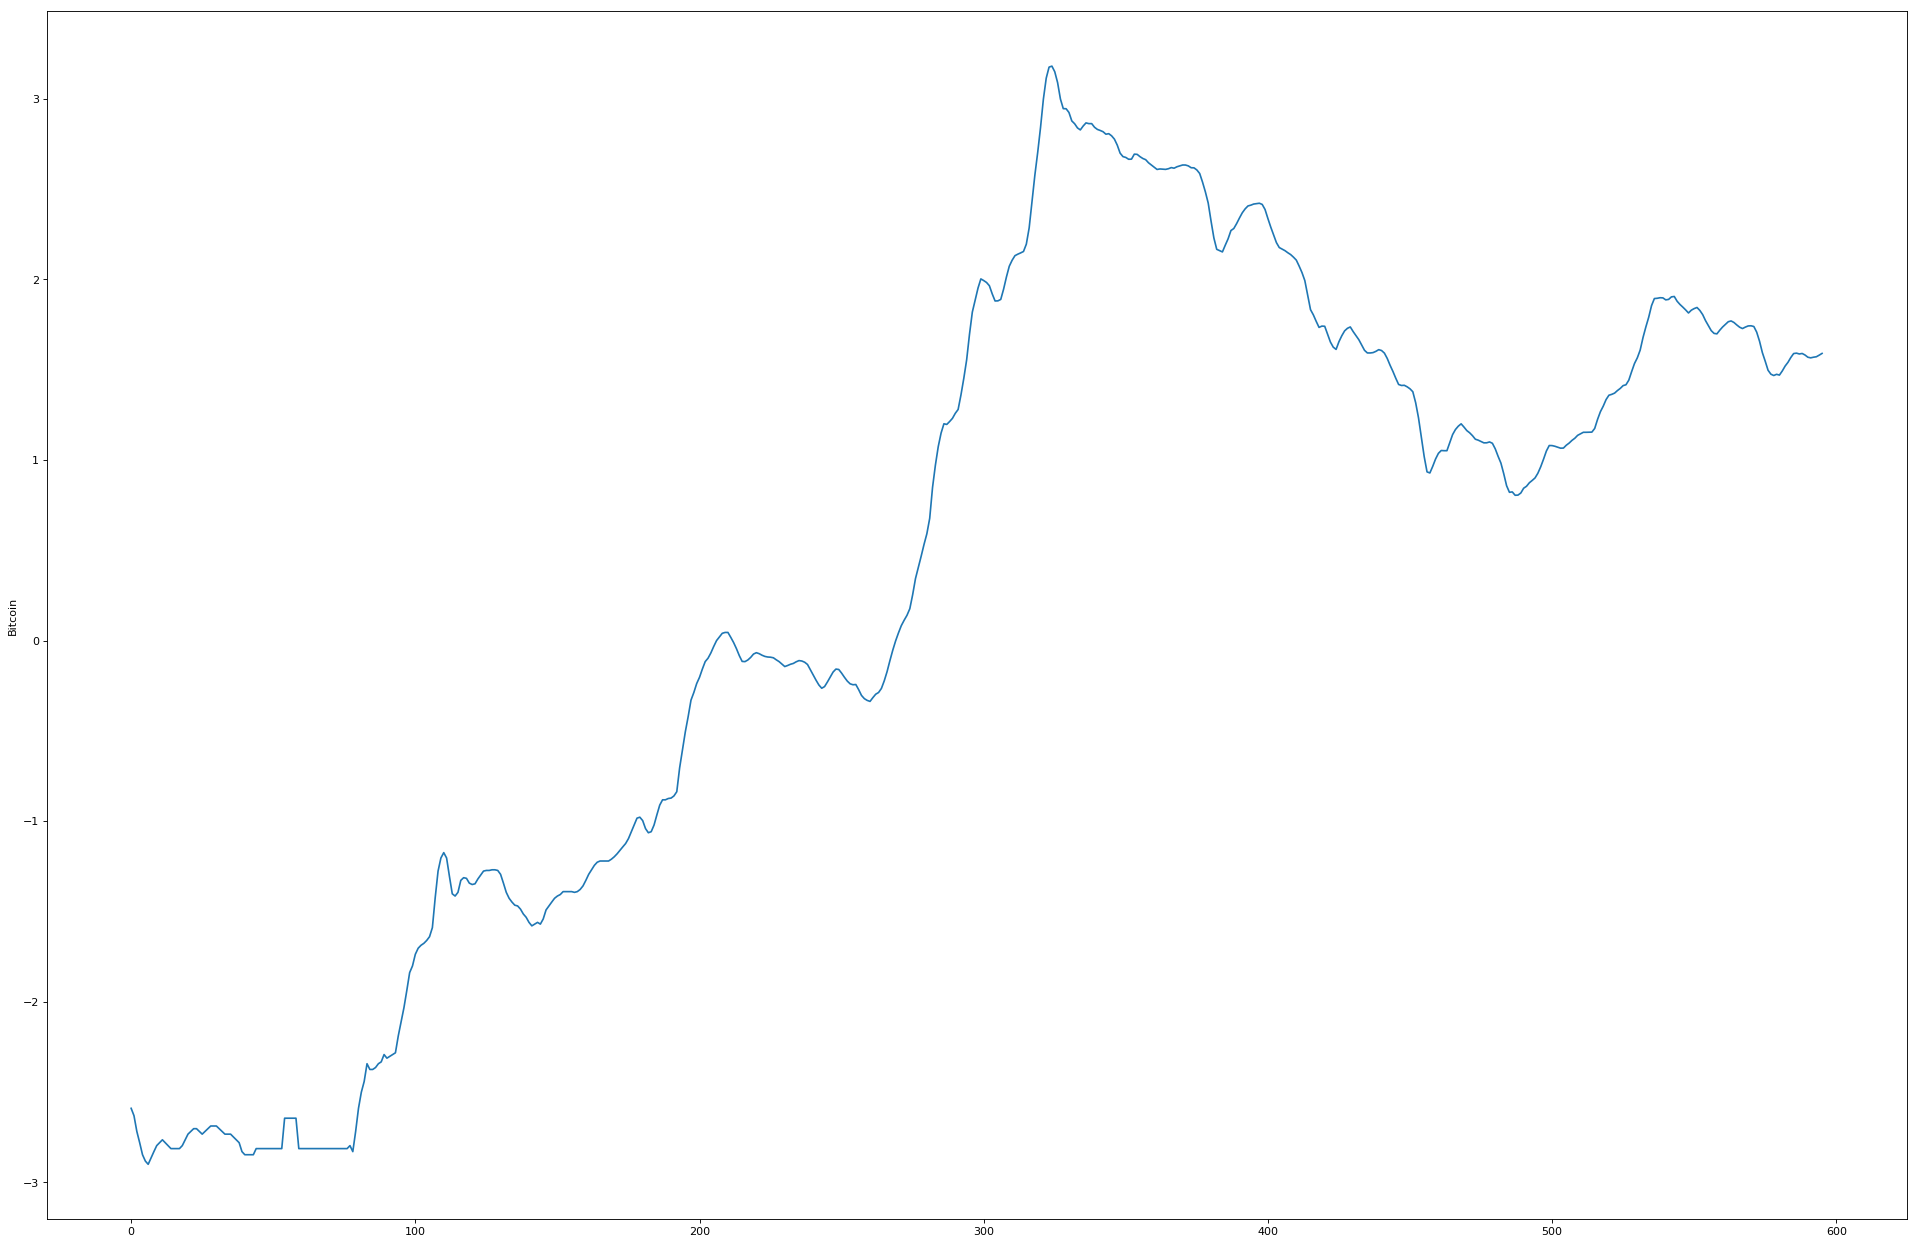

In [151]:
logplot(simpleconv(MD0[:600],5))

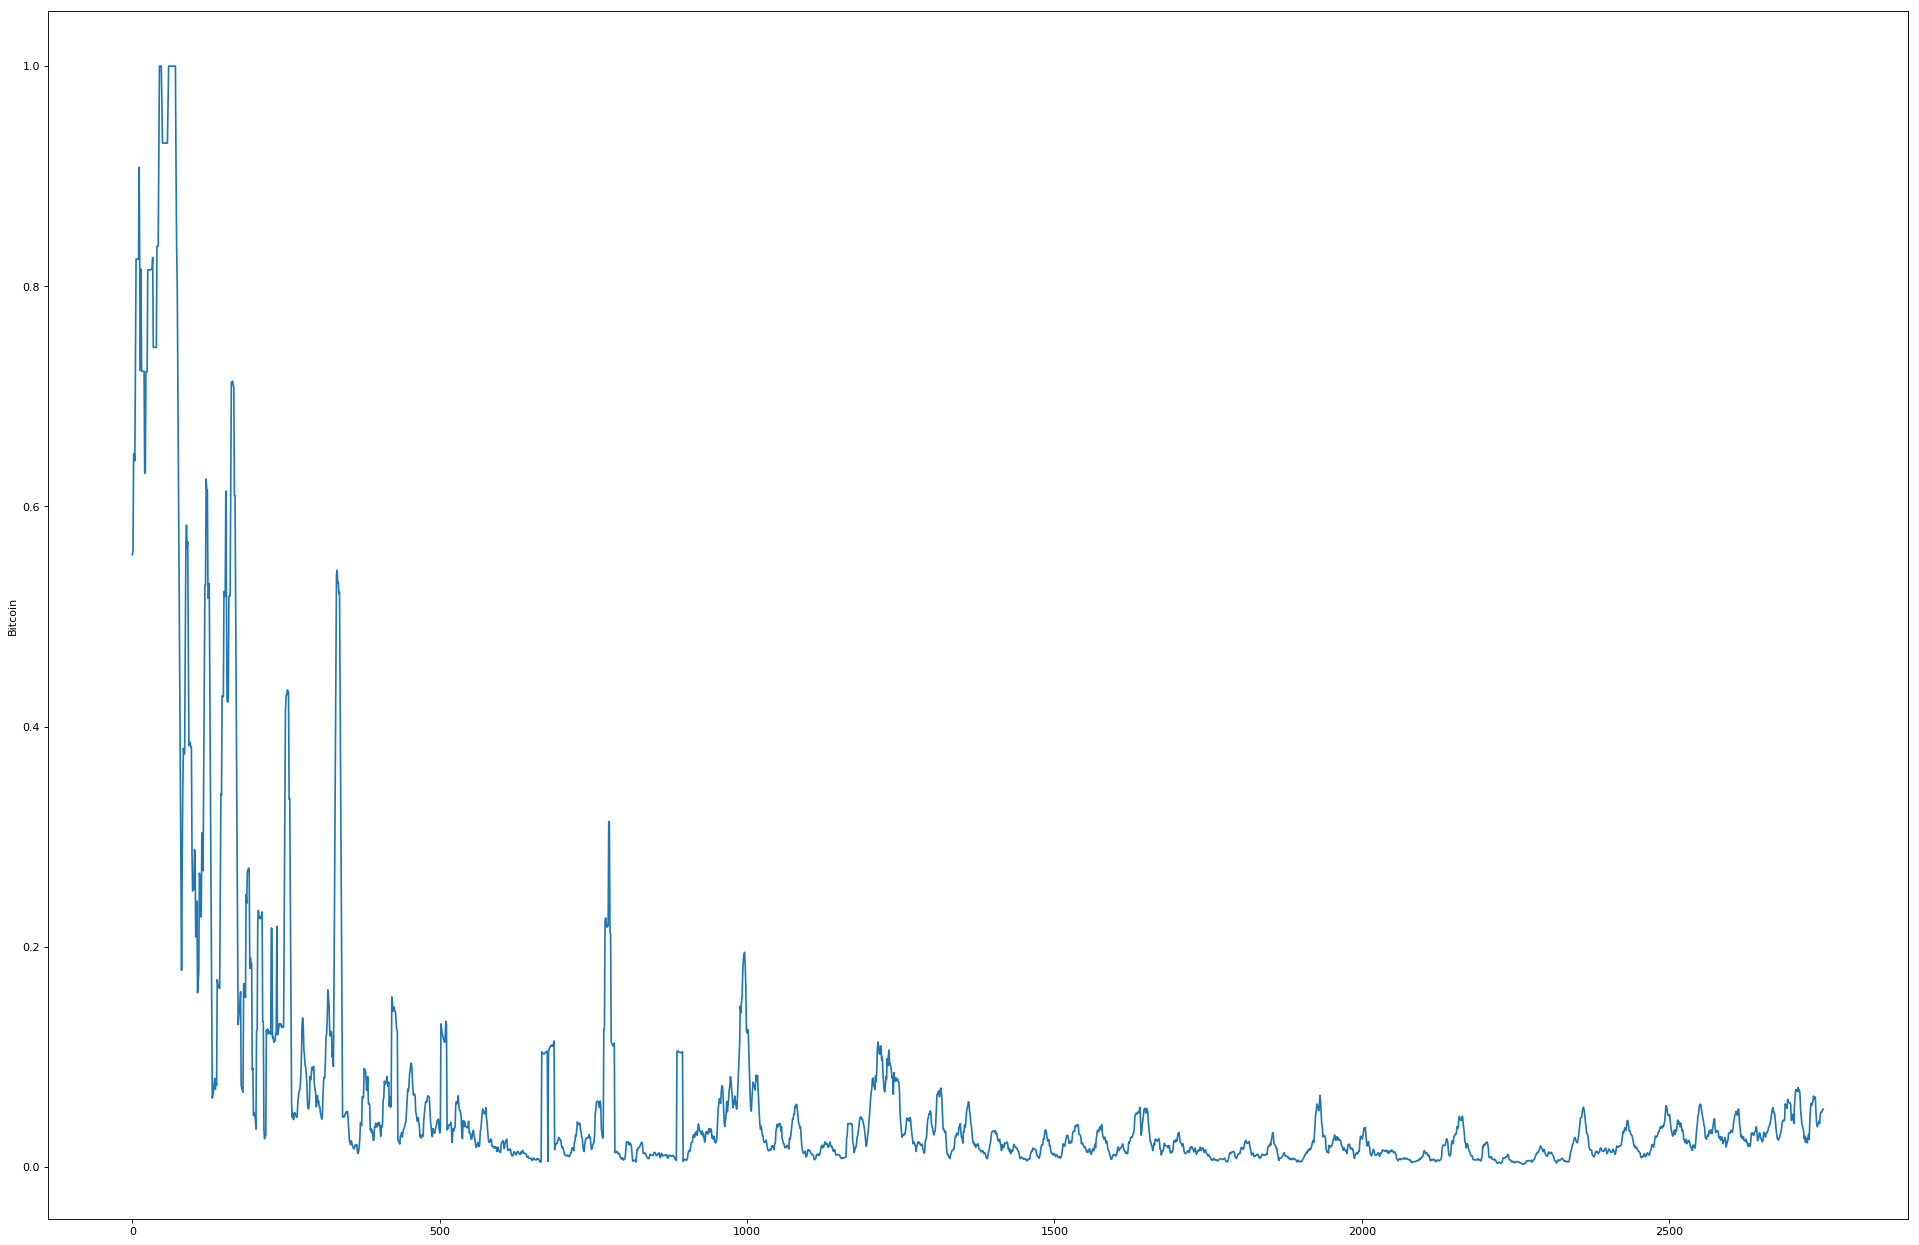

In [145]:
plot(simpleconv(logfriend(diff(list(map(log,MD0)))),10))

In [144]:
print(np.mean(diff(list(map(log,MD0)))[1500:]))

0.00214895021295


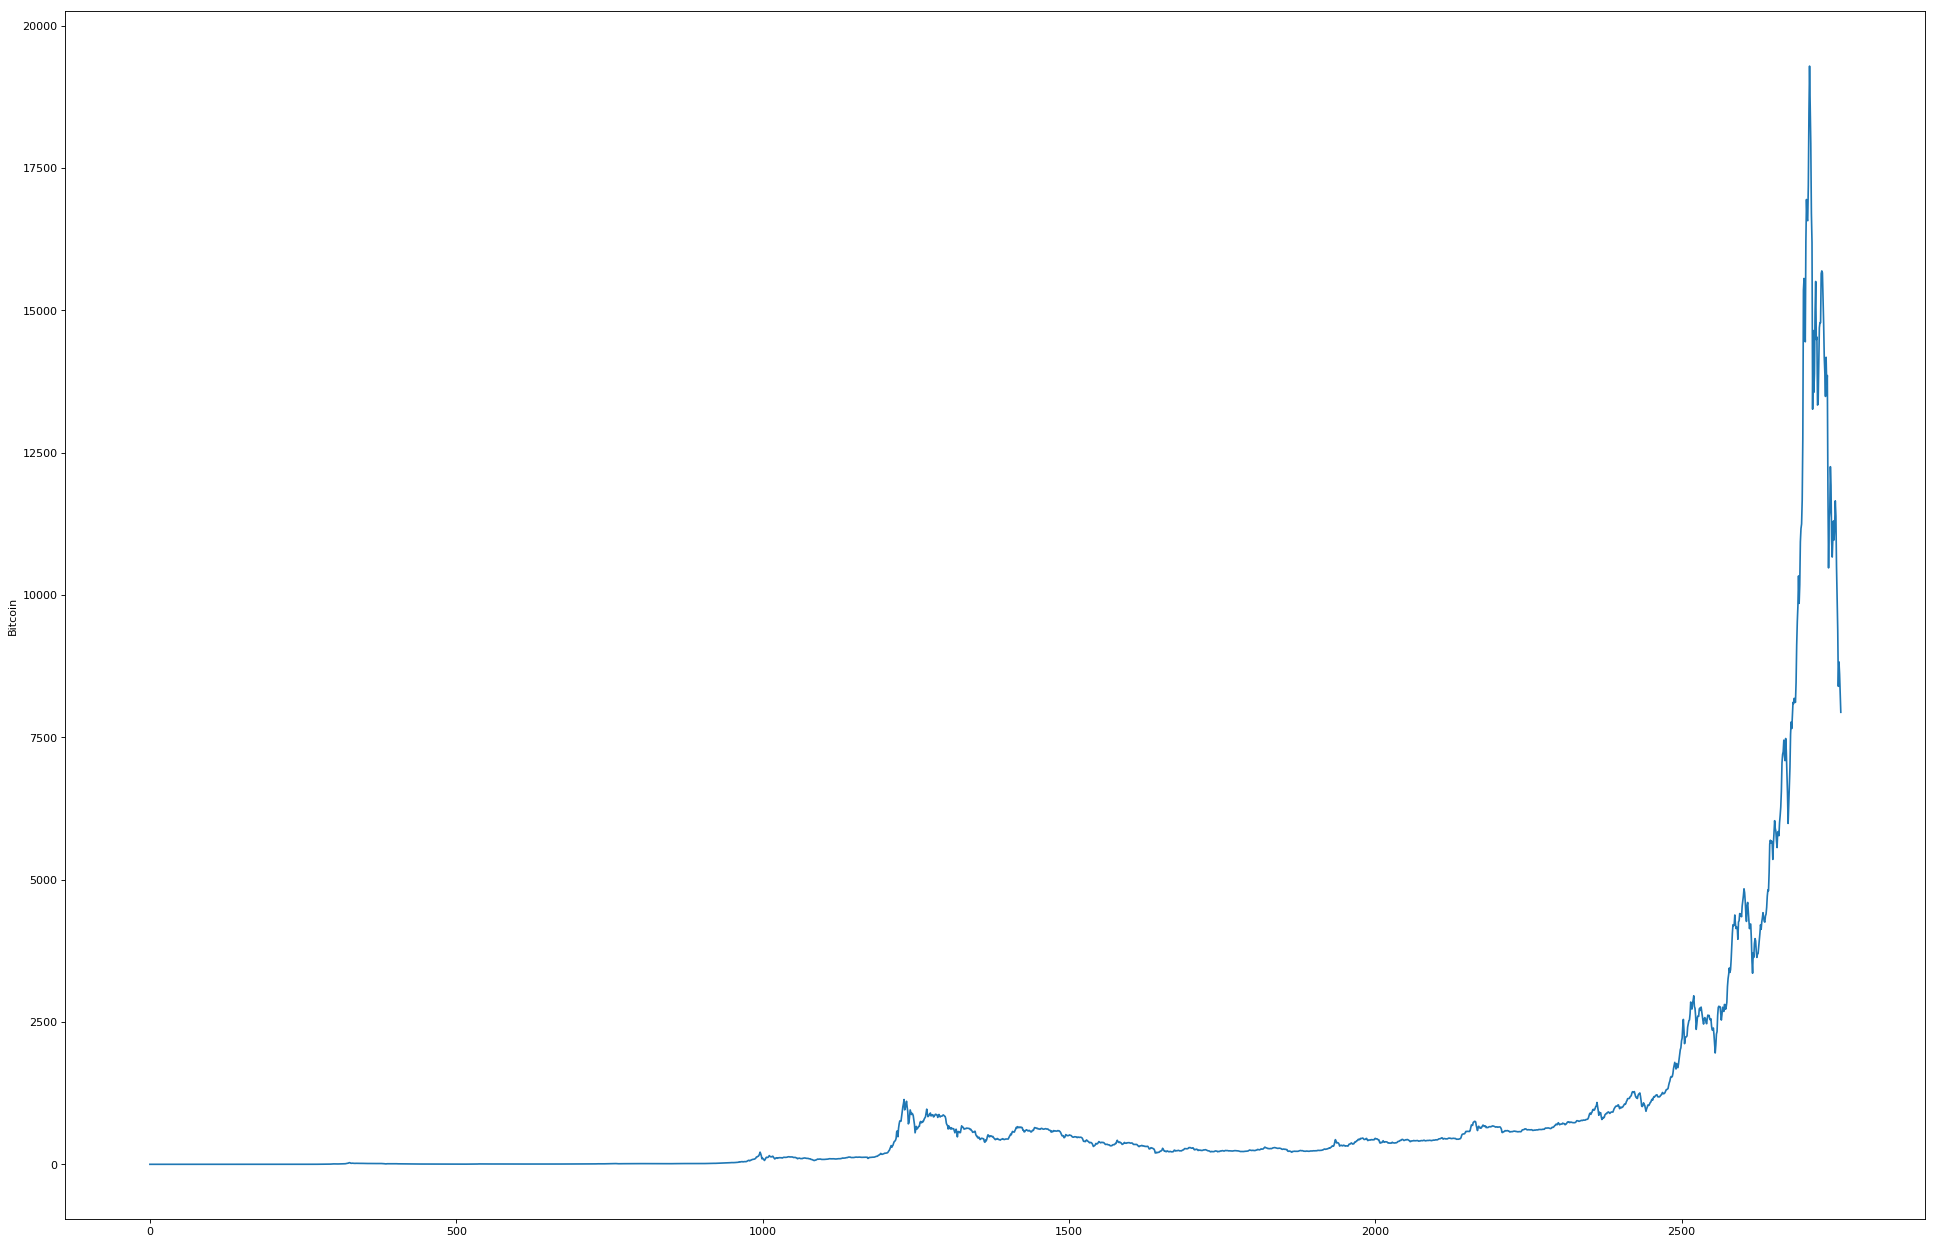

In [146]:
plot(MD0)

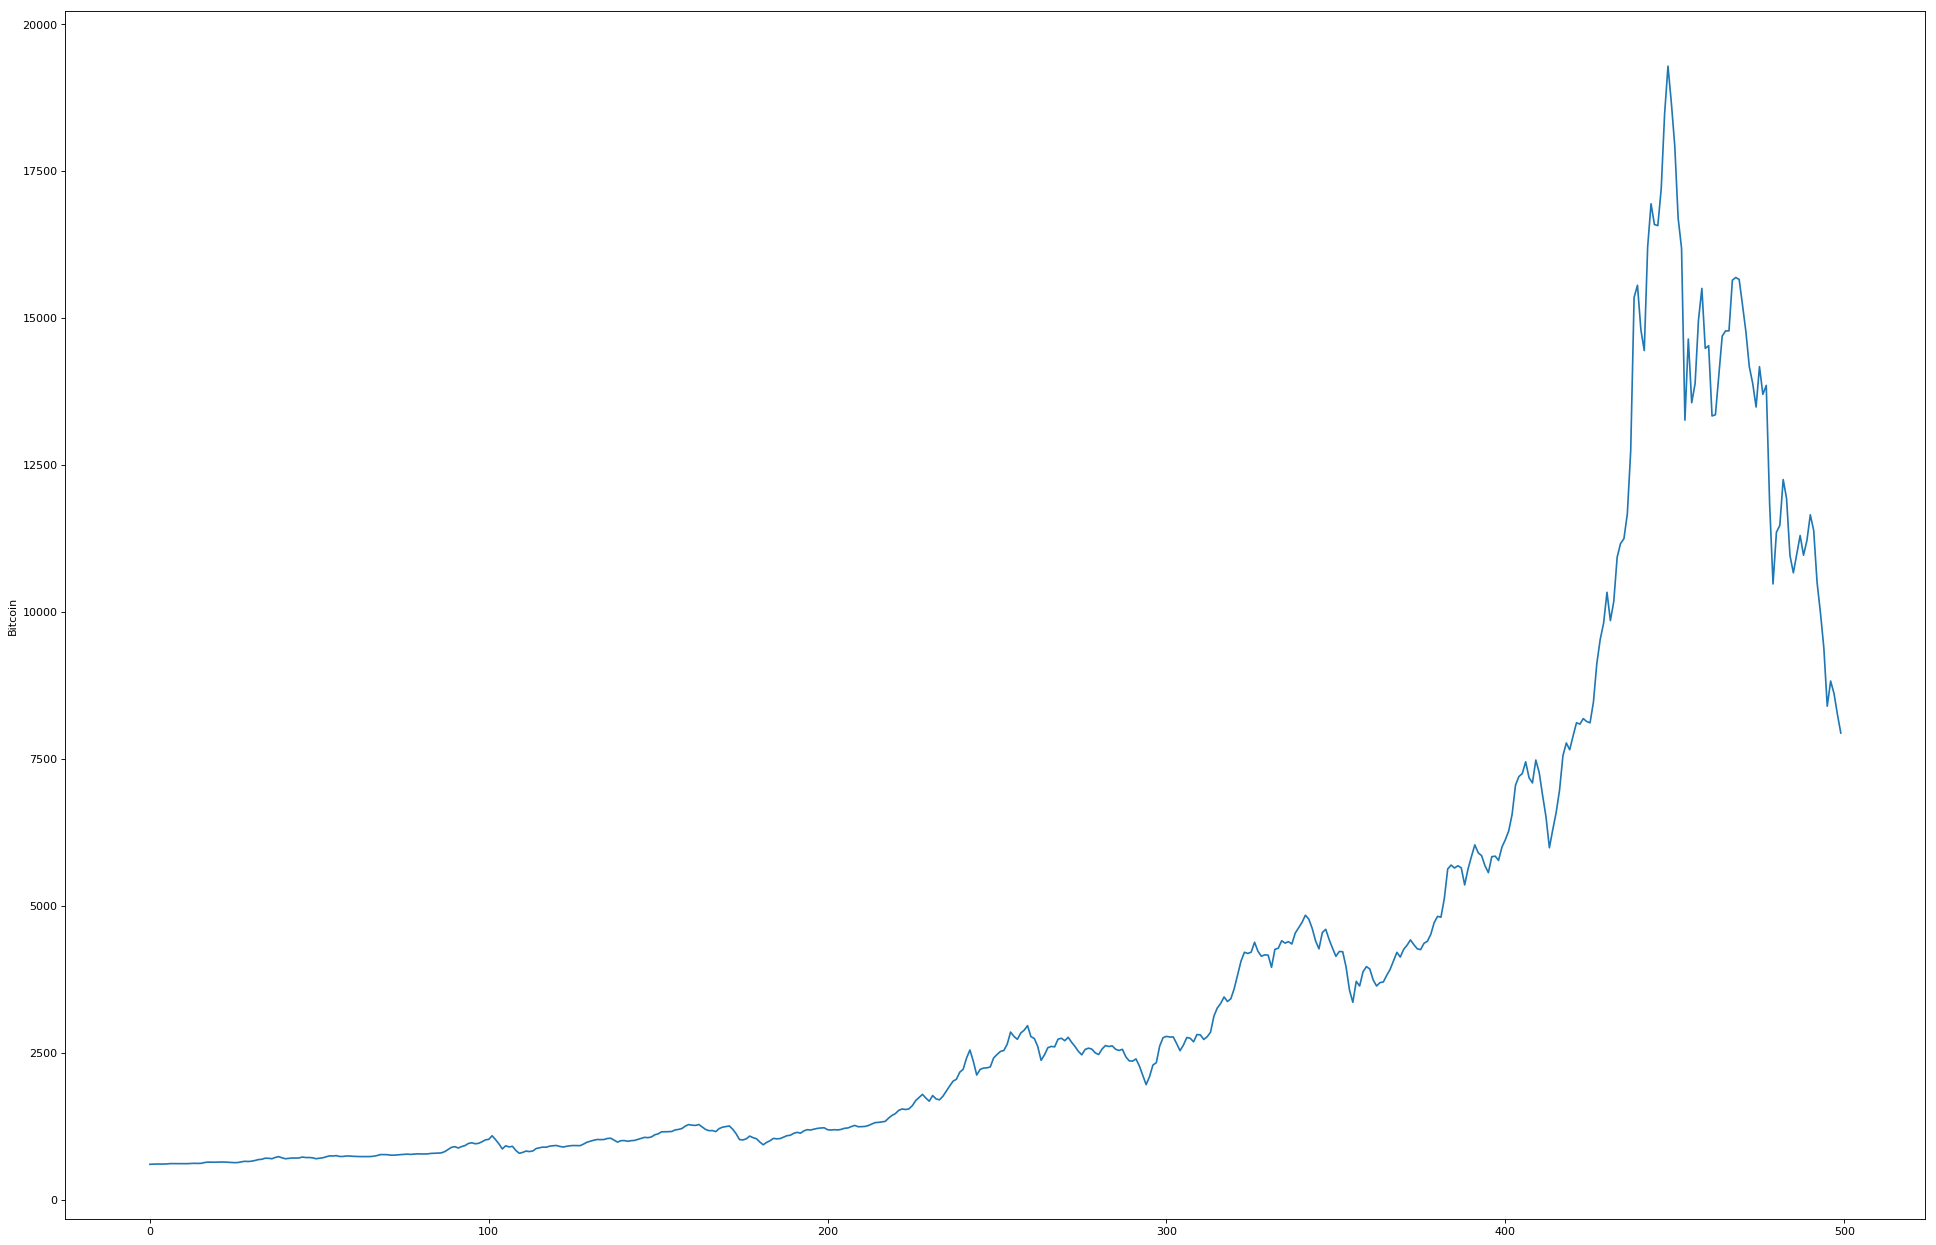

In [147]:
plot(MD0[-500:])